## Import the necessary libraries

In [1]:
# Importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


## Read the data as a data frame

In [2]:
# Read the data in dataframe
raw_data = pd.read_csv("bank-full.csv")

# Create copy of original data to work with, so that we can refrence original data in future
df = raw_data.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Perform basic EDA which should include the following.

### a. Shape of the data

In [3]:
df.shape

(45211, 17)

### b. Data type of each attribute

In [4]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

### c. Checking the presence of missing values

In [5]:
df.isnull().values.any()

False

### d. 5 Point summary of numerical attributes

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Prepare the data to train a model – check if data types are appropriate, get rid of the missing values.

In [7]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [8]:
print(df.job.value_counts())
print(df.marital.value_counts())
print(df.education.value_counts())
print(df.default.value_counts())
print(df.housing.value_counts())
print(df.loan.value_counts())
print(df.contact.value_counts())
print(df.month.value_counts())
print(df.poutcome.value_counts())
print(df.poutcome.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
u

In [9]:
replaceStruct = {
                "education":     {"primary": 1, "secondary": 2 ,"tertiary": 3 ,"unknown":-1} 
                    }
oneHotCols=["job","marital","default","housing", "loan","contact","month","poutcome"]


In [10]:
df=df.replace(replaceStruct)
df=pd.get_dummies(df, columns=oneHotCols)
df.head(10)

,age,education,balance,day,duration,campaign,pdays,previous,Target,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,3,2143,5,261,1,-1,0,no,0,...,0,0,1,0,0,0,0,0,0,1
1,44,2,29,5,151,1,-1,0,no,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,2,5,76,1,-1,0,no,0,...,0,0,1,0,0,0,0,0,0,1
3,47,-1,1506,5,92,1,-1,0,no,0,...,0,0,1,0,0,0,0,0,0,1
4,33,-1,1,5,198,1,-1,0,no,0,...,0,0,1,0,0,0,0,0,0,1
5,35,3,231,5,139,1,-1,0,no,0,...,0,0,1,0,0,0,0,0,0,1
6,28,3,447,5,217,1,-1,0,no,0,...,0,0,1,0,0,0,0,0,0,1
7,42,3,2,5,380,1,-1,0,no,0,...,0,0,1,0,0,0,0,0,0,1
8,58,1,121,5,50,1,-1,0,no,0,...,0,0,1,0,0,0,0,0,0,1
9,43,2,593,5,55,1,-1,0,no,0,...,0,0,1,0,0,0,0,0,0,1


## Train a few standard classification algorithms

In [11]:
X = df.drop("Target" , axis=1)
y = df.pop("Target")

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

### Fitting data to KNN Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(X_train, y_train)

ypred_KNN = KNN_model.predict(X_test)
KNN_score = KNN_model.score(X_test, y_test)

print( '{:<{}s}'.format('KNN Classifier', 20) + ' \t\t '+ f'{round(KNN_score,3)}')

KNN Classifier       		 0.884


### Fitting data to Naive Bayes Calssifier

In [15]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
diab_model = GaussianNB()

diab_model.fit(X_train, y_train)

ypred_LogReg = diab_model.predict(X_test)

diab_score = diab_model.score(X_test, y_test)
print( '{:<{}s}'.format('Logistic Regression', 20) + ' \t\t '+ f'{round(diab_score,3)}')

Logistic Regression  		 0.848


## Build the ensemble models and compare the results with the base models.

## Build Decision Tree Model

In [16]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))



1.0
0.8779121203184901


## Reducing over fitting (Regularization)

In [17]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))



0.9005276961481341
0.9019463285166618


##                            Ensemble Learning - Bagging

In [31]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.9068858743733412


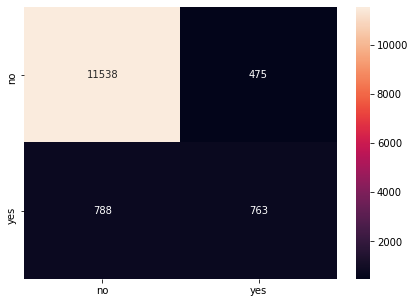

In [32]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=['no', 'yes'])

df_cm = pd.DataFrame(cm, index = [i for i in ["no","yes"]],
                  columns = [i for i in ["no","yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - AdaBoosting

In [22]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.8948687702742554


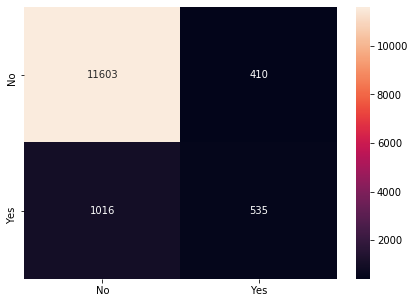

In [23]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=['no', 'yes'])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble RandomForest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

0.9062223532881156


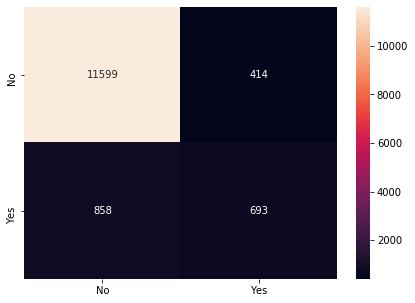

In [28]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=['no', 'yes'])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## Compare performances of all the models

## On cmparing the output of all above models Bagging classifier performs the best, ensemble models gives slightly better accuracy then standered classification algorithems.